In [1]:
# import ecole

# from retro_branching.utils import SearchTree, seed_stochastic_modules_globally
# from retro_branching.environments import EcoleBranching
# from retro_branching.agents import PseudocostBranchingAgent

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.algorithms.shortest_paths.generic import shortest_path
from networkx.algorithms.traversal.depth_first_search import dfs_tree
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import math
from ordered_set import OrderedSet
import copy
from collections import defaultdict

import manim as mn

Manim Community v0.15.2

First, create a graph in `networkx` which we want to visualise with `manim`.

In [2]:
# seed = 2 # 1
# seed_stochastic_modules_globally(default_seed=seed)

# agent = PseudocostBranchingAgent()

# env = EcoleBranching(observation_function='default',
#                      information_function='default',
#                      reward_function='default',
#                      scip_params='gasse_2019' # default dfs gasse_2019
#                     )
# env.seed(seed)

# ecole.seed(seed)
# instances = ecole.instance.SetCoverGenerator(n_rows=200, n_cols=200, density=0.05) # 200x200seed=1 300x300seed=2

In [3]:
# # initialise an instance which is not pre-solved by SCIP
# done = True
# while done:
#     env.seed(seed)
#     instance = next(instances)
#     agent.before_reset(instance)
#     obs, action_set, reward, done, info = env.reset(instance)
    
# # solve the instance with the brancher
# t = 0
# tree = SearchTree(env.model)
# # tree.render()
# while not done:
#     # select branching action
#     action, action_idx = agent.action_select(action_set, model=env.model, done=done)
#     obs, action_set, reward, done, info = env.step(action)
    
#     # print step info
#     m = env.model.as_pyscipopt()
#     if len(tree.tree.graph['visited_node_ids']) > 1 and not done:
#         prev_node_id = tree.tree.graph['visited_node_ids'][-2]
#     else:
#         prev_node_id = tree.tree.graph['visited_node_ids'][-1]
#     curr_node_id = tree.curr_node_id
#     print(f'Step {t} | Nodes added: {abs(int(reward["num_nodes"]))} | primal bound: {m.getPrimalbound()} | dual bound: {m.getDualbound()} | prev_node_id (branched at): {prev_node_id} | next_node_id (not yet branched at): {curr_node_id} | optimum_node_id: {tree.tree.graph["optimum_node_ids"][-1]}\n')
    
#     # update search tree
#     tree.update_tree(env.model)
# #     tree.render()
        
#     t += 1
        
# m = env.model.as_pyscipopt()
# print(f'\nFinished | primal bound: {m.getPrimalbound()} | dual bound: {m.getDualbound()} | # nodes: {m.getNTotalNodes()} | Final node: {tree.tree.graph["visited_nodes"][-1]} | Optimum node id: {tree.tree.graph["optimum_node_ids"][-1]}')
# print(f'SCIP NTotalNodes: {env.model.as_pyscipopt().getNTotalNodes()}')
# tree.render()

In [4]:
# print(tree.tree)

In [17]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(mn.Scene):
    def construct(self):
        # create shapes
        circle = mn.Circle()
        square = mn.Square()
        
        # show shapes
        self.play(mn.Create(square))
        self.play(mn.Transform(square, circle))
        self.play(mn.FadeOut(square))

In [18]:
%%manim -qm -v WARNING MovingVertices

class MovingVertices(mn.Scene):
    def construct(self):
        vertices = [1, 2, 3, 4]
        edges = [(1, 2), (2, 3), (3, 4), (1, 3), (1, 4)]
        g = mn.Graph(vertices, edges)
        self.play(mn.Create(g))
        self.wait()
        self.play(g[1].animate.move_to([1, 1, 0]),
                  g[2].animate.move_to([-1, 1, 0]),
                  g[3].animate.move_to([1, -1, 0]),
                  g[4].animate.move_to([-1, -1, 0]))
        self.wait()

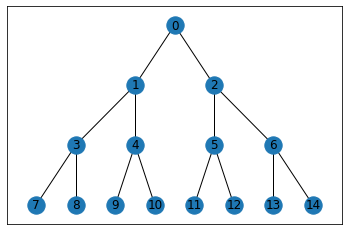

In [16]:
nx_tree = nx.balanced_tree(2, 3)

pos = graphviz_layout(nx_tree, prog='dot')
nx.draw_networkx(nx_tree, pos)
plt.show()


In [135]:
%%manim -qm -v WARNING Tree

class Tree(mn.Scene):
    def construct_nx_tree(self, *args, **kwargs):
        return nx.balanced_tree(*args, **kwargs)
    
    def construct(self, node_fade_run_time=1):
        # nx_tree = self.construct_nx_tree(1, 0)
        # # pos = graphviz_layout(nx_tree, prog='dot')
        # G = mn.Graph.from_networkx(nx_tree, layout='tree', root_vertex=0)
        # self.play(mn.Create(G), run_time=node_fade_run_time)
        # self.wait()
        
        nx_tree = self.construct_nx_tree(2, 3)
        pos = graphviz_layout(nx_tree, prog='dot', root=0)
        max_val = 1
        for val in pos.values():
            x, y = val
            max_val = max(max_val, abs(x), abs(y))
        factor = 8
        root_x_shift, root_y_shift = 0 - pos[0][0], 0 - pos[0][1]
        for key, val in pos.items():
            # add z dim to pos and re-scale to 0 -1 range
            x, y = val
            pos[key] = ((x+root_x_shift)*factor/(max_val), (y+root_y_shift)*factor/(max_val), 0)
        print(pos)
        # G = mn.Graph.from_networkx(nx_tree, layout='tree', root_vertex=0)
        G = mn.Graph.from_networkx(nx_tree, layout=pos)
        # G = mn.Graph(nx_tree.nodes, nx_tree.edges, layout=pos)
        self.add(G)
        # self.play(mn.Create(G), run_time=node_fade_run_time)
        self.wait()
        
        # vertex_id = 1
        # new_vertices = [3, 4]
        # new_edges = [(vertex_id, child_id) for child_id in new_vertices]
        # self.play(
        #     G.animate.add_edges(*new_edges)
        #     )
        # self.wait()

{0: (0.0, 0.0, 0), 1: (-1.0847457627118644, -1.0847457627118644, 0), 2: (1.0847457627118644, -1.0847457627118644, 0), 3: (-2.711864406779661, -2.169491525423729, 0), 4: (-1.0847457627118644, -2.169491525423729, 0), 5: (1.0847457627118644, -2.169491525423729, 0), 6: (2.711864406779661, -2.169491525423729, 0), 7: (-3.7966101694915255, -3.2542372881355934, 0), 8: (-2.711864406779661, -3.2542372881355934, 0), 9: (-1.6271186440677967, -3.2542372881355934, 0), 10: (-0.5423728813559322, -3.2542372881355934, 0), 11: (0.5423728813559322, -3.2542372881355934, 0), 12: (1.6271186440677967, -3.2542372881355934, 0), 13: (2.711864406779661, -3.2542372881355934, 0), 14: (3.7966101694915255, -3.2542372881355934, 0)}


In [51]:
%%manim -qm -v WARNING LargeTreeGeneration

from manim import *

class LargeTreeGeneration(MovingCameraScene):
    DEPTH = 4
    CHILDREN_PER_VERTEX = 3
    LAYOUT_CONFIG = {"vertex_spacing": (0.5, 1)}
    VERTEX_CONF = {"radius": 0.25, "color": BLUE_B, "fill_opacity": 1}

    def expand_vertex(self, g, vertex_id: str, depth: int):
        new_vertices = [f"{vertex_id}/{i}" for i in range(self.CHILDREN_PER_VERTEX)]
        new_edges = [(vertex_id, child_id) for child_id in new_vertices]
        g.add_edges(
            *new_edges,
            vertex_config=self.VERTEX_CONF,
            positions={
                k: g.vertices[vertex_id].get_center() + 0.1 * DOWN for k in new_vertices
            },
        )
        if depth < self.DEPTH:
            for child_id in new_vertices:
                self.expand_vertex(g, child_id, depth + 1)

        return g

    def construct(self):
        g = Graph(["ROOT"], [], vertex_config=self.VERTEX_CONF)
        g = self.expand_vertex(g, "ROOT", 1)
        self.add(g)

        self.play(
            g.animate.change_layout(
                "tree",
                root_vertex="ROOT",
                layout_config=self.LAYOUT_CONFIG,
            )
        )
        self.play(self.camera.auto_zoom(g, margin=1), run_time=0.5)

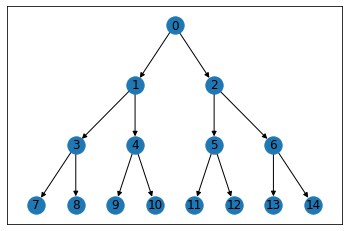

removing edges


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


removing edges
removed


In [196]:
%%manim -qm -v WARNING Tree

class Tree(mn.Scene):
    def construct_nx_tree(self, *args, **kwargs):
        return nx.balanced_tree(*args, **kwargs)
    
    def conv_nx_pos_to_mn_pos(self, nx_pos, scale_factor=1):
        mn_pos = {}
        
        # find max val so can normalise
        max_val = 1
        for val in nx_pos.values():
            x, y = val
            max_val = max(max_val, abs(x), abs(y))
            
        # find how much to shift axes
        root_x_shift, root_y_shift = 0 - pos[0][0], 0 - pos[0][1]
        
        # add z dim to pos, shift coords to centre, and re-scale to 0-1 range
        for key, val in nx_pos.items():
            x, y = val
            mn_pos[key] = ((x+root_x_shift)*scale_factor/(max_val), (y+root_y_shift)*scale_factor/(max_val), 0)
            
        return mn_pos
    
    def get_animated_tree_pos(self, nx_tree, final_tree_pos):
        animated_tree_pos = {}
        for node in nx_tree.nodes():
            animated_tree_pos[node] = final_tree_pos[node]
        return animated_tree_pos
    
    def add_nodes(self, nodes, run_time=None, animate=True, node_config=None):
        if not isinstance(nodes, list):
            nodes = [nodes]
        removed_edges = []
        for node in nodes:
            print('removing edges')
            if node in self.nx_animated_graph.nodes:
                # record which edges have been removed
                for edge in self.nx_animated_graph.in_edges(node):
                    removed_edges.append(edge)
                for edge in self.nx_animated_graph.out_edges(node):
                    removed_edges.append(edge)
                
                # remove node from nx graph
                self.nx_animated_graph.remove_node(node)
                
                # remove node from mn graph
                self.mn_animated_graph.remove_vertices(*[node])
                print('removed')
        
        # add node to nx graph
        self.nx_animated_graph.add_nodes_from(nodes)
        
        # add node to mn graph
        nodes_pos = self.get_animated_tree_pos(self.nx_animated_graph, self.mn_final_tree_pos)
        self.play(
            self.mn_animated_graph.animate.add_vertices(*nodes, positions=nodes_pos, vertex_config=node_config),
            run_time=run_time
            )
        self.wait()
        
        # add any removed edges back
        if len(removed_edges) > 0:
            self.add_edges(removed_edges, animate=False)
        
    def add_edges(self, edges, run_time=None, animate=True):
        # update nx graph
        if not isinstance(edges, list):
            edges = [edges]
        self.nx_animated_graph.add_edges_from(edges)
        
        # update mn graph
        nodes = [edge[-1] for edge in edges]
        nodes_pos = self.get_animated_tree_pos(self.nx_animated_graph, self.mn_final_tree_pos)
        if animate:
            self.play(
                self.mn_animated_graph.animate.add_edges(*edges, positions=nodes_pos),
                run_time=run_time
                )
            self.wait()
        else:
            self.mn_animated_graph.add_edges(*edges, positions=nodes_pos),
    
    def construct(self, 
                  node_fade_run_time=0.75, 
                  edge_fade_run_time=0.75, 
                  scale_factor=8):
        # construct final version of tree to get node positions
        nx_final_tree = self.construct_nx_tree(2, 3, create_using=nx.DiGraph())
        nx_final_tree_pos = graphviz_layout(nx_final_tree, prog='dot')
        nx.draw_networkx(nx_final_tree, nx_final_tree_pos)
        plt.show()
        self.mn_final_tree_pos = self.conv_nx_pos_to_mn_pos(nx_final_tree_pos, scale_factor=scale_factor)
        
        # initialise animation graph
        self.nx_animated_graph = nx.DiGraph()
        self.mn_animated_graph = mn.Graph.from_networkx(self.nx_animated_graph)
        
        # populate animation graph until tree fully built
        visited_node_ids = list(nx_final_tree.nodes())
        for step_idx, node in enumerate(visited_node_ids):
            # add node
            if node not in self.nx_animated_graph.nodes:
                self.add_nodes(node, run_time=node_fade_run_time, animate=True)
            
            # add edges
            branches = list(nx_final_tree.out_edges(node))
            self.add_edges(branches, run_time=edge_fade_run_time, animate=True)
            
            # change colour of node
            self.add_nodes(node, node_config={'color': mn.BLUE})
            
        